<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/Final_GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load your dataset
data = pd.read_excel('/content/New_data_2_GANS.xlsx', engine='openpyxl')

In [3]:
# Separate input (X) and output (y) variables
X = data.iloc[:, :8]  # Assuming the first 8 columns are input features
y = data.iloc[:, 8:]  # Assuming the last 3 columns are output variables

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.multioutput import MultiOutputRegressor


In [9]:
# Define the hyperparameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5],
    'estimator__subsample': [0.8, 0.9, 1.0],
    'estimator__min_samples_split': [2, 3, 4],
}



In [11]:
# GBR
gbr = MultiOutputRegressor(GradientBoostingRegressor())
gbr.fit(X_train, y_train)

# RF
rf = MultiOutputRegressor(RandomForestRegressor())
rf.fit(X_train, y_train)

# SVM
svm = MultiOutputRegressor(SVR())
svm.fit(X_train, y_train)

# Define the hyperparameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5],
    'estimator__subsample': [0.8, 0.9, 1.0],
    'estimator__min_samples_split': [2, 3, 4],
}

# GBR Tuned
gbr_tuned = GridSearchCV(MultiOutputRegressor(GradientBoostingRegressor()), param_grid, cv=5, n_jobs=-1)
gbr_tuned.fit(X_train, y_train)

# Update the models dictionary
models = {
    "GBR": gbr,
    "GBR Tuned": gbr_tuned.best_estimator_,  # Use the best estimator from hyperparameter tuning
    "RF": rf,
    "SVM": svm,
}


In [12]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train = r2_score(y_train, y_train_pred, multioutput='uniform_average')
        r2_test = r2_score(y_test, y_test_pred, multioutput='uniform_average')
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
        
        mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
        mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')
        
        print(f"{name} Model Evaluation:")
        print(f"R2 Score - Train: {r2_train}, Test: {r2_test}")
        print(f"RMSE - Train: {rmse_train}, Test: {rmse_test}")
        print(f"MAE - Train: {mae_train}, Test: {mae_test}")
        print()


In [13]:
evaluate_models(models, X_train, X_test, y_train, y_test)

def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train = r2_score(y_train, y_train_pred, multioutput='uniform_average')
        r2_test = r2_score(y_test, y_test_pred, multioutput='uniform_average')
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
        
        mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
        mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')
        
        print(f"{name} Model Evaluation:")
        print(f"R2 Score - Train: {r2_train}, Test: {r2_test}")
        print("RMSE:")
        print(f"Train: {rmse_train}, Test: {rmse_test}")
        print("MAE:")
        print(f"Train: {mae_train}, Test: {mae_test}")
        print()

evaluate_models(models, X_train, X_test, y_train, y_test)


GBR Model Evaluation:
R2 Score - Train: 0.8011992950101575, Test: 0.7276536055476703
RMSE - Train: [4.42700265 3.77630209 3.52290267], Test: [5.13546797 4.67108995 3.42060603]
MAE - Train: [2.55355247 2.46029924 2.28731155], Test: [3.11179105 2.93289517 2.32085961]

GBR Tuned Model Evaluation:
R2 Score - Train: 0.7996284114418118, Test: 0.7259957725765309
RMSE - Train: [4.43921406 3.77840136 3.55717823], Test: [5.1046708  4.79629803 3.37943391]
MAE - Train: [2.6079996  2.50363399 2.36376842], Test: [3.13212877 3.07292473 2.33242259]

RF Model Evaluation:
R2 Score - Train: 0.8014636378923994, Test: 0.7233424409137196
RMSE - Train: [4.41018522 3.79950049 3.51234016], Test: [5.16067921 4.74301895 3.43246113]
MAE - Train: [2.31159668 2.27616658 2.03234438], Test: [2.87008266 2.73544385 2.04560196]

SVM Model Evaluation:
R2 Score - Train: 0.10990651036156729, Test: 0.0976180606461781
RMSE - Train: [8.2498742  8.15352852 8.61465687], Test: [7.58902511 8.70110789 7.85210922]
MAE - Train: [6.2

In [14]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train = r2_score(y_train, y_train_pred, multioutput='uniform_average')
        r2_test = r2_score(y_test, y_test_pred, multioutput='uniform_average')
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
        
        mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
        mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')
        
        results[name] = {
            "R2_train": r2_train,
            "R2_test": r2_test,
            "RMSE_train": rmse_train,
            "RMSE_test": rmse_test,
            "MAE_train": mae_train,
            "MAE_test": mae_test,
        }
        
    return results


In [15]:
import pandas as pd

results = evaluate_models(models, X_train, X_test, y_train, y_test)
results_df = pd.DataFrame(results).T


In [16]:
results_df.to_excel("model_evaluation_results.xlsx")


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
cv_results = pd.DataFrame(gbr_tuned.cv_results_)
cv_results = cv_results[['param_estimator__n_estimators', 'param_estimator__learning_rate', 'mean_test_score']]


In [19]:
pivoted_cv_results = cv_results.pivot_table(values='mean_test_score', index='param_estimator__n_estimators', columns='param_estimator__learning_rate')


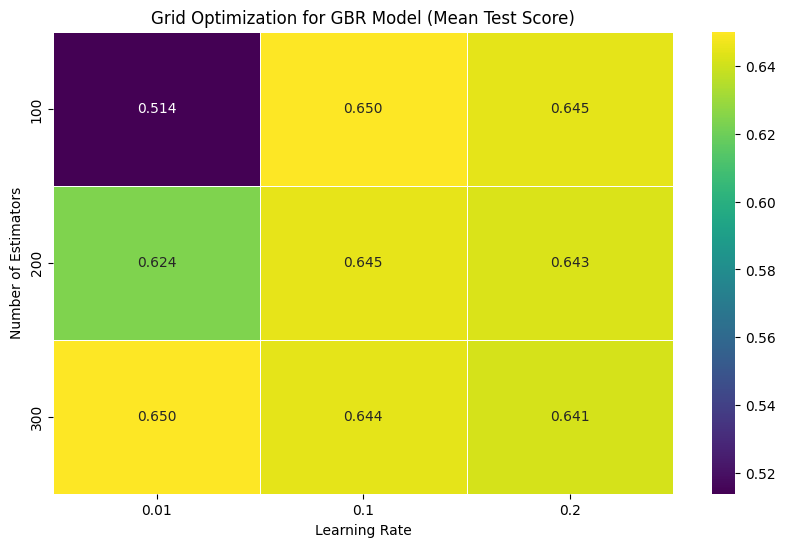

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivoted_cv_results, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
plt.title('Grid Optimization for GBR Model (Mean Test Score)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
}

svm_tuned = GridSearchCV(MultiOutputRegressor(SVR()), param_grid_svm, cv=5, n_jobs=-1, scoring='r2')
svm_tuned.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultiOutputRegressor(estimator=SVR()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10],
                         'estimator__kernel': ['linear', 'rbf']},
             scoring='r2')

In [22]:
cv_results_svm = pd.DataFrame(svm_tuned.cv_results_)
cv_results_svm = cv_results_svm[['param_estimator__C', 'param_estimator__kernel', 'mean_test_score']]


In [23]:
pivoted_cv_results_svm = cv_results_svm.pivot_table(values='mean_test_score', index='param_estimator__C', columns='param_estimator__kernel')


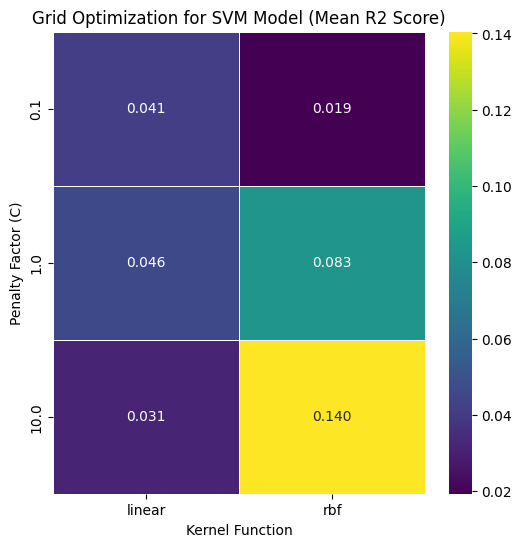

In [24]:
plt.figure(figsize=(6, 6))
sns.heatmap(pivoted_cv_results_svm, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
plt.title('Grid Optimization for SVM Model (Mean R2 Score)')
plt.xlabel('Kernel Function')
plt.ylabel('Penalty Factor (C)')
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [26]:
y_pred_gbr = gbr.predict(X_test)


In [31]:
y_test_np = np.asarray(y_test)
y_pred_gbr_np = np.asarray(y_pred_gbr)


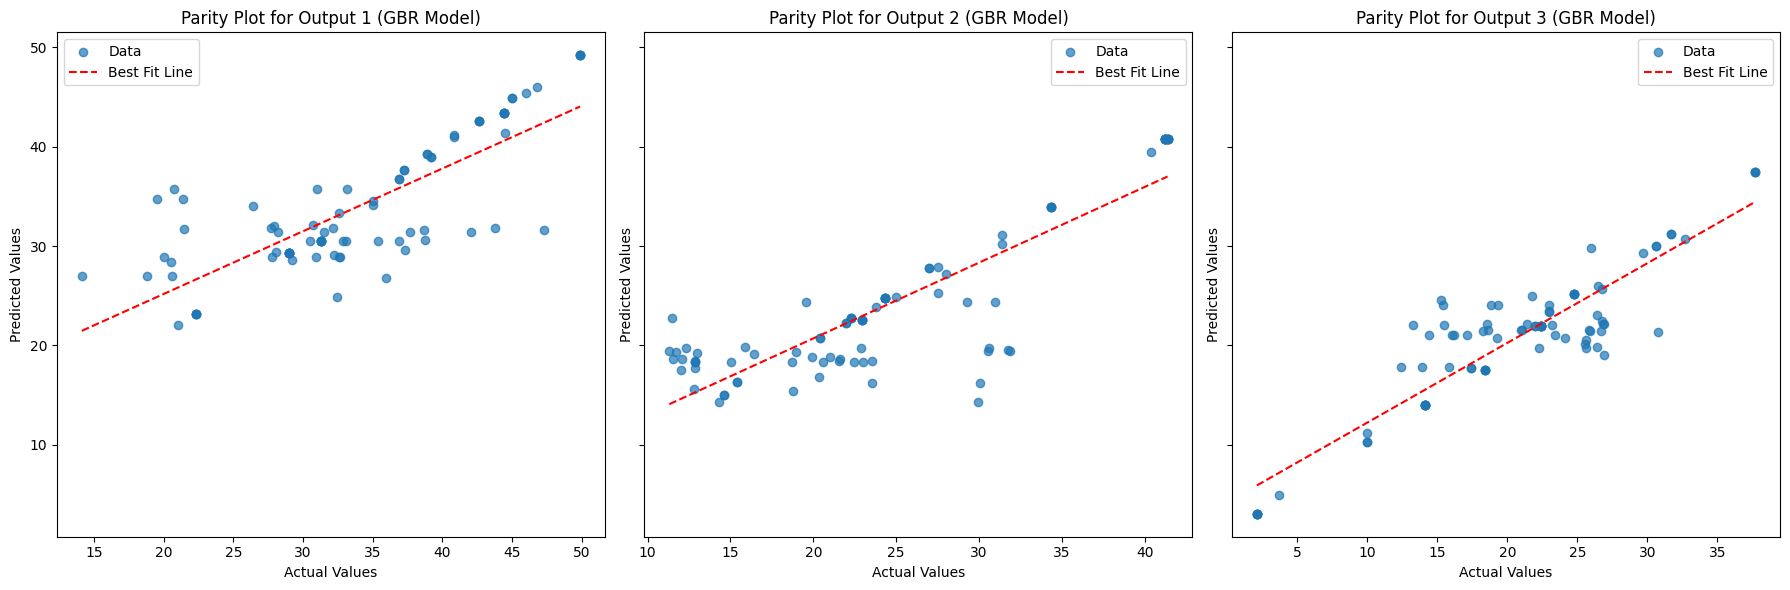

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
output_names = ['Output 1', 'Output 2', 'Output 3']

for i, ax in enumerate(axes):
    ax.scatter(y_test_np[:, i], y_pred_gbr_np[:, i], label='Data', alpha=0.7)
    
    # Line of best fit
    best_fit_line = np.poly1d(np.polyfit(y_test_np[:, i], y_pred_gbr_np[:, i], 1))
    x_range = np.linspace(y_test_np[:, i].min(), y_test_np[:, i].max(), 100)
    ax.plot(x_range, best_fit_line(x_range), color='red', linestyle='--', label='Best Fit Line')
    
    ax.set_title(f'Parity Plot for {output_names[i]} (GBR Model)')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

plt.tight_layout()
plt.show()


In [33]:
y_pred_gbr_train = gbr.predict(X_train)
y_pred_gbr_test = gbr.predict(X_test)


In [35]:
y_train_np = np.asarray(y_train)
y_test_np = np.asarray(y_test)
y_pred_gbr_train_np = np.asarray(y_pred_gbr_train)
y_pred_gbr_test_np = np.asarray(y_pred_gbr_test)


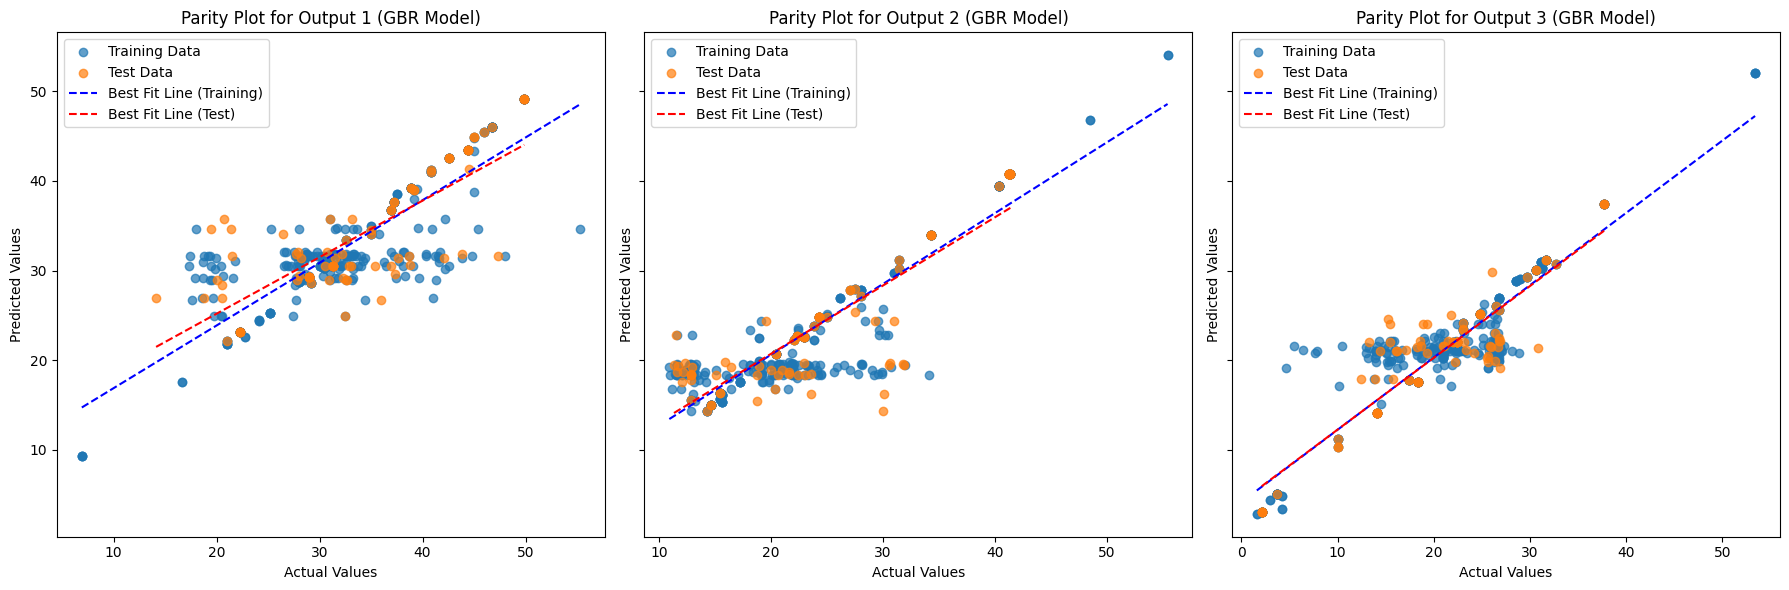

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
output_names = ['Output 1', 'Output 2', 'Output 3']

for i, ax in enumerate(axes):
    ax.scatter(y_train_np[:, i], y_pred_gbr_train_np[:, i], label='Training Data', alpha=0.7)
    ax.scatter(y_test_np[:, i], y_pred_gbr_test_np[:, i], label='Test Data', alpha=0.7)
    
    # Line of best fit
    best_fit_line_train = np.poly1d(np.polyfit(y_train_np[:, i], y_pred_gbr_train_np[:, i], 1))
    best_fit_line_test = np.poly1d(np.polyfit(y_test_np[:, i], y_pred_gbr_test_np[:, i], 1))
    
    x_range_train = np.linspace(y_train_np[:, i].min(), y_train_np[:, i].max(), 100)
    x_range_test = np.linspace(y_test_np[:, i].min(), y_test_np[:, i].max(), 100)
    
    ax.plot(x_range_train, best_fit_line_train(x_range_train), color='blue', linestyle='--', label='Best Fit Line (Training)')
    ax.plot(x_range_test, best_fit_line_test(x_range_test), color='red', linestyle='--', label='Best Fit Line (Test)')
    
    ax.set_title(f'Parity Plot for {output_names[i]} (GBR Model)')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

plt.tight_layout()
plt.show()


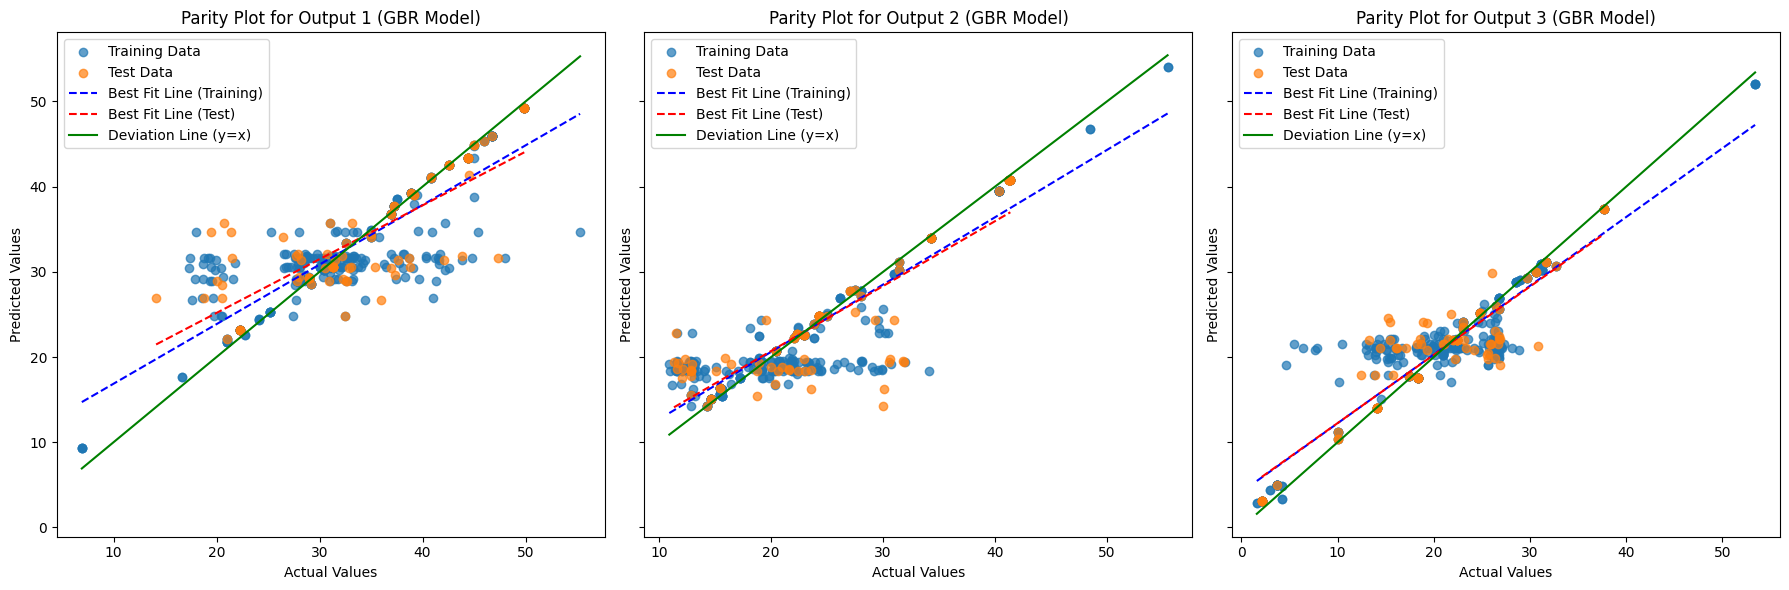

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
output_names = ['Output 1', 'Output 2', 'Output 3']

for i, ax in enumerate(axes):
    ax.scatter(y_train_np[:, i], y_pred_gbr_train_np[:, i], label='Training Data', alpha=0.7)
    ax.scatter(y_test_np[:, i], y_pred_gbr_test_np[:, i], label='Test Data', alpha=0.7)
    
    # Line of best fit
    best_fit_line_train = np.poly1d(np.polyfit(y_train_np[:, i], y_pred_gbr_train_np[:, i], 1))
    best_fit_line_test = np.poly1d(np.polyfit(y_test_np[:, i], y_pred_gbr_test_np[:, i], 1))
    
    x_range_train = np.linspace(y_train_np[:, i].min(), y_train_np[:, i].max(), 100)
    x_range_test = np.linspace(y_test_np[:, i].min(), y_test_np[:, i].max(), 100)
    
    ax.plot(x_range_train, best_fit_line_train(x_range_train), color='blue', linestyle='--', label='Best Fit Line (Training)')
    ax.plot(x_range_test, best_fit_line_test(x_range_test), color='red', linestyle='--', label='Best Fit Line (Test)')
    
    # Deviation line (y=x)
    combined_range = np.linspace(min(y_train_np[:, i].min(), y_test_np[:, i].min()), max(y_train_np[:, i].max(), y_test_np[:, i].max()), 100)
    ax.plot(combined_range, combined_range, color='green', linestyle='-', label='Deviation Line (y=x)')
    
    ax.set_title(f'Parity Plot for {output_names[i]} (GBR Model)')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

plt.tight_layout()
plt.show()


In [38]:
y_pred_svm_train = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)


In [39]:
y_pred_svm_train_np = np.asarray(y_pred_svm_train)
y_pred_svm_test_np = np.asarray(y_pred_svm_test)
y_pred_rf_train_np = np.asarray(y_pred_rf_train)
y_pred_rf_test_np = np.asarray(y_pred_rf_test)


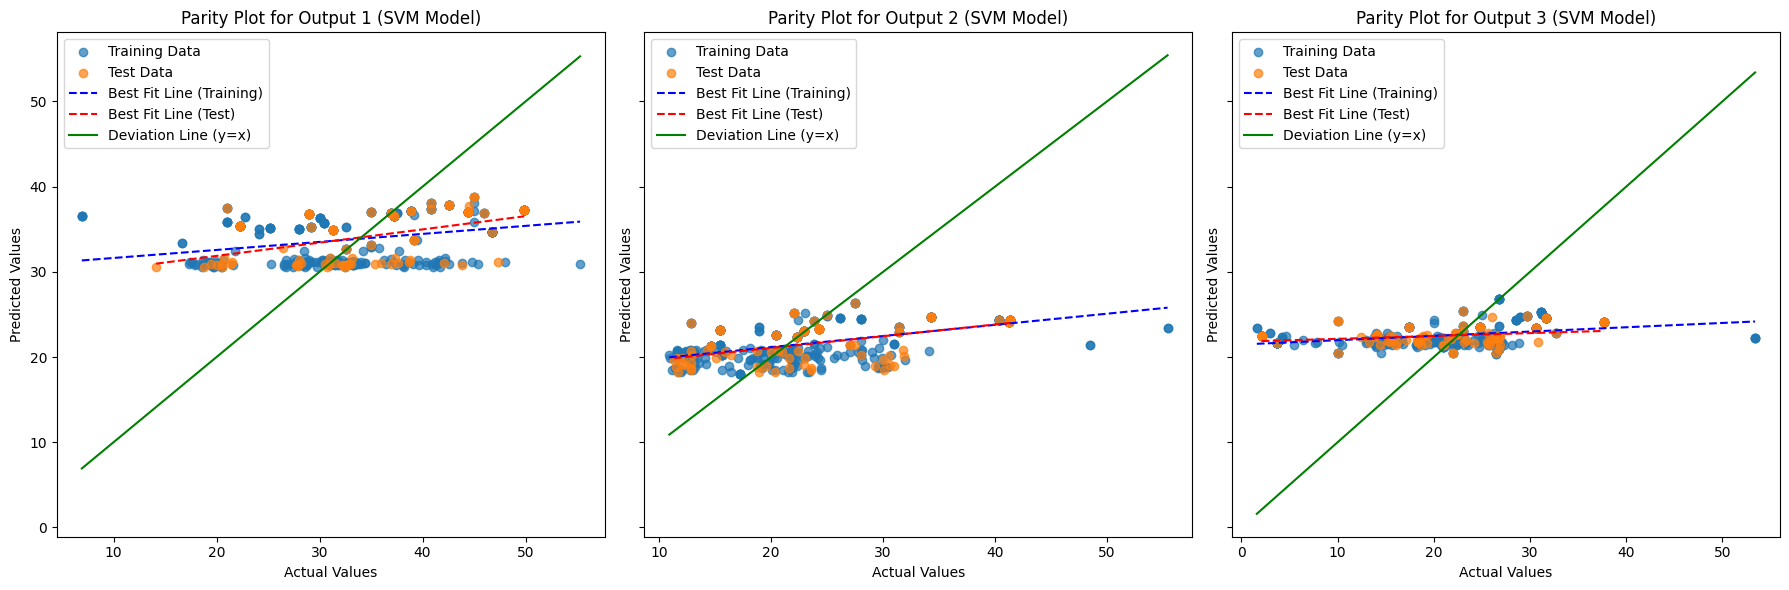

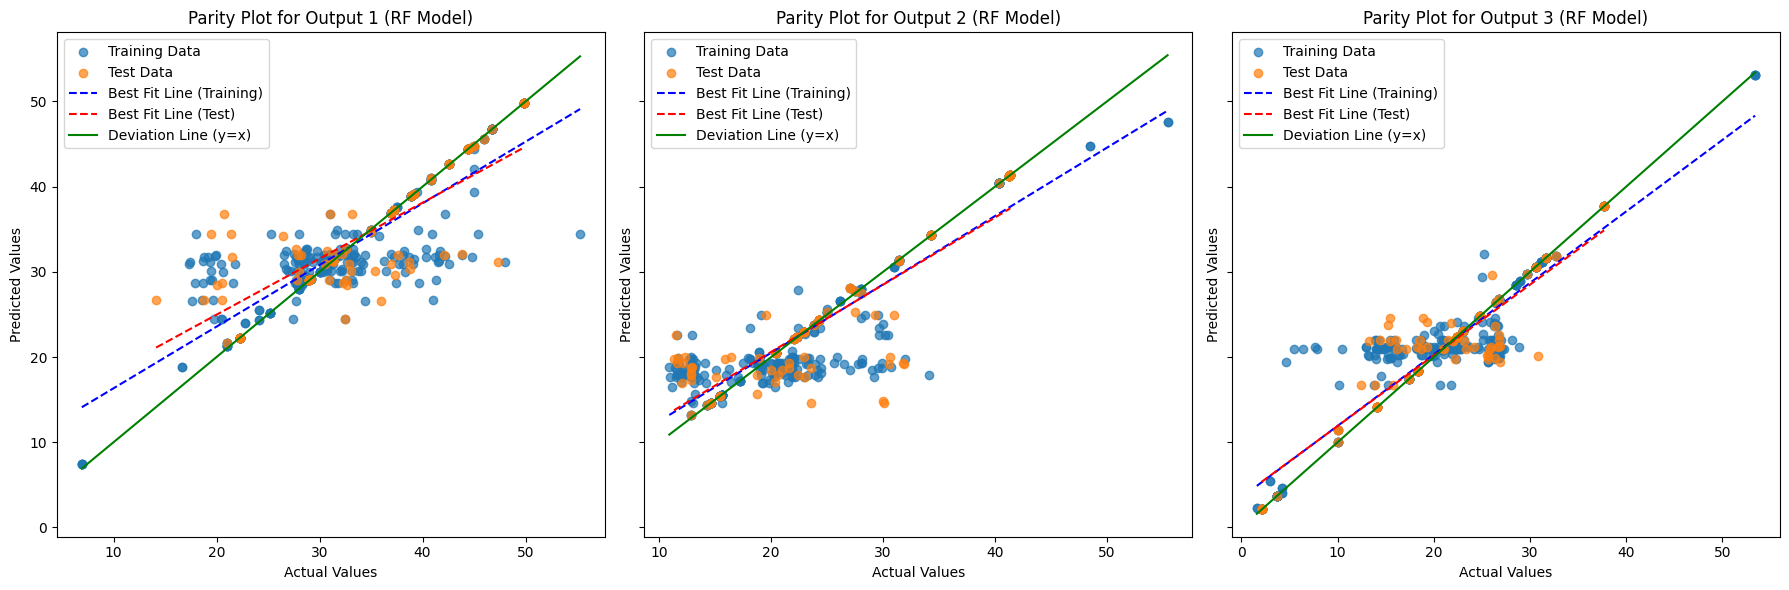

In [40]:
# Function to create parity plots
def create_parity_plot(model_name, y_train_np, y_test_np, y_pred_train_np, y_pred_test_np):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    output_names = ['Output 1', 'Output 2', 'Output 3']

    for i, ax in enumerate(axes):
        ax.scatter(y_train_np[:, i], y_pred_train_np[:, i], label='Training Data', alpha=0.7)
        ax.scatter(y_test_np[:, i], y_pred_test_np[:, i], label='Test Data', alpha=0.7)

        # Line of best fit
        best_fit_line_train = np.poly1d(np.polyfit(y_train_np[:, i], y_pred_train_np[:, i], 1))
        best_fit_line_test = np.poly1d(np.polyfit(y_test_np[:, i], y_pred_test_np[:, i], 1))

        x_range_train = np.linspace(y_train_np[:, i].min(), y_train_np[:, i].max(), 100)
        x_range_test = np.linspace(y_test_np[:, i].min(), y_test_np[:, i].max(), 100)

        ax.plot(x_range_train, best_fit_line_train(x_range_train), color='blue', linestyle='--', label='Best Fit Line (Training)')
        ax.plot(x_range_test, best_fit_line_test(x_range_test), color='red', linestyle='--', label='Best Fit Line (Test)')

        # Deviation line (y=x)
        combined_range = np.linspace(min(y_train_np[:, i].min(), y_test_np[:, i].min()), max(y_train_np[:, i].max(), y_test_np[:, i].max()), 100)
        ax.plot(combined_range, combined_range, color='green', linestyle='-', label='Deviation Line (y=x)')

        ax.set_title(f'Parity Plot for {output_names[i]} ({model_name} Model)')
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Parity plot for SVM model
create_parity_plot('SVM', y_train_np, y_test_np, y_pred_svm_train_np, y_pred_svm_test_np)

# Parity plot for RF model
create_parity_plot('RF', y_train_np, y_test_np, y_pred_rf_train_np, y_pred_rf_test_np)


In [42]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 23.0 MB/s eta 0:00:00


In [45]:
import shap
from sklearn.multioutput import MultiOutputRegressor


